<a href="https://colab.research.google.com/github/akarsh1207/Time-Series-Forecasting-and-Filtering/blob/main/Lorenz_%2B_Rosslers_Attractors_%2B_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lorenz Attractor with Noise
___

##Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install colorednoise
import colorednoise as cn
import pdb
plt.close('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Parameter definitions

In [ ]:
"""

	Parameters
	----------
	system : string
		Type of system to solve (`lorenz_stochastic`, `rossler_stochastic`, or
	   `noise`). The default is `lorenz_stochastic`.
	observables : list
		Which variables are observed (0 is x, 1 is y, 2 is z).
		The default is [0].
	length : int
		Time series length. The default is 10000.
	x0 : list
		Starting condition. If None, a random starting condition is selected.
		The default is None.
	p : list
		List of system parameters. The default is for the Lorenz system:
		[10.0, 8.0/3.0, 28.0].
	step : int
		Integration step. The default is 0.001.
	sample : int
		Temporal sampling at output. The default is 0.03.
	discard : int
		Number of steps to discard at the beginning. The default is 1000.
	epsilon_sde : float
		Intensity of noise perturbing the dynamics. The default is 0.0.
	epsilon_add : float
		Intensity of observational noise. The default is 0.0.
	beta_add : int
		Exponent to characterize the power spectrum of the observational noise.
		For white noise beta_add = 0.0 (gaussian).
		For pink noise beta_add = 1.0 (flicker).
		For red noise beta_add = 2.0 (Browinan).
		The default is 0.0.

	Returns
	-------
	t_obs : array
		Time stamps at which the observation is taken.
	X_obs : 2-d array
		Observed time series.
	t_gen : array
		Time stamps at which the system has been integrated.
	X_gen : 2-d array
		Generated time series (i.e., without observational noise added).

	"""

## Lorenz Stochastic

In [51]:
def _gen_lorenz_stochastic(length=10000, x0=None, sigma=10.0, \
						beta=8.0/3.0, rho=28.0,step=0.001, \
						sample=0.03, discard=1000, \
						epsilon_sde=0.0, observables=[0]):

	if not x0:
		x0 = (0.0, -0.01, 9.0) + 0.25 * (-1 + 2 * np.random.random(3))

	sample = int(sample / step)
	t = np.linspace(0, (sample * (length + discard)) * step, \
								  sample * (length + discard))
	Nt_simulation = len(t)
	X = np.zeros((Nt_simulation,3))
	X[0,:] = x0

	for tt in range(Nt_simulation-1):
		r = np.random.randn(3)
		X[tt+1,0] = X[tt,0] + (sigma * (X[tt,1] - X[tt,0])) * \
			step + epsilon_sde*np.sqrt(step)*r[0]
		X[tt+1,1] = X[tt,1] + (X[tt,0] * (rho - X[tt,2]) - \
			X[tt,1])*step + epsilon_sde*np.sqrt(step)*r[1]
		X[tt+1,2] = X[tt,2] + (X[tt,0] * X[tt,1] - beta * X[tt,2]) * \
			step + epsilon_sde*np.sqrt(step)*r[2]
	t_gen = t[discard*sample:]
	t_gen = t_gen-t_gen[0]
	X_gen = X[discard*sample:,:]
	t_obs = t[discard*sample::sample]
	t_obs = t_obs-t_obs[0]
	X_obs = X[discard*sample::sample, observables]
	return t_obs,X_obs,t_gen,X_gen


In [52]:
A = _gen_lorenz_stochastic()
print(A)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[-10.63540156],
       [ -8.060309  ],
       [ -5.71165191],
       ...,
       [  4.48517425],
       [  3.73502649],
       [  3.25380877]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[-10.63540156,  -2.07512367,  37.55036618],
       [-10.54979878,  -1.97147657,  37.47230165],
       [-10.46401556,  -1.86957422,  37.39317419],
       ...,
       [  3.01825029,   2.46757076,  21.79247108],
       [  3.01274349,   2.48383906,  21.74180557],
       [  3.00745445,   2.50020956,  21.69131059]]))


In [53]:
a = A[3]
x1 = a[:,0]
y1 = a[:,1]
z1 = a[:,2]

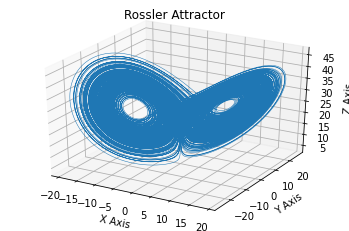

In [54]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x1,y1,z1, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Rossler Attractor")

plt.show()

##Rossler Stochastic

In [55]:
def _gen_rossler_stochastic(length=10000, x0=None, a=0.2, b=0.2, c=5.7, \
						 step=0.001, sample=0.03, discard=1000, \
						 epsilon_sde=0.0, observables=[0]):

	if not x0:
		x0 = (-9.0, 0.0, 0.0) + 0.25 * (-1 + 2 * np.random.random(3))

	sample = int(sample / step)
	t = np.linspace(0, (sample * (length + discard)) * step, \
			  sample * (length + discard))

	Nt_simulation = len(t)
	X = np.zeros((Nt_simulation,3))
	X[0,:] = x0

	for tt in range(Nt_simulation-1):
		r = np.random.randn(1)
		X[tt+1,0] = X[tt,0] - (X[tt,1] + X[tt,2])*step + \
									epsilon_sde*np.sqrt(step)*r[0]
		X[tt+1,1] = X[tt,1] + (X[tt,0] + a*X[tt,1])*step
		X[tt+1,2] = X[tt,2] + (b + X[tt,2] * (X[tt,0]-c)) * step
		if np.isnan(X[tt+1,0]):
			pdb.set_trace()
		if np.isnan(X[tt+1,1]):
			pdb.set_trace()
		if np.isnan(X[tt+1,2]):
			pdb.set_trace()
	t_gen = t[discard*sample:]
	t_gen = t_gen-t_gen[0]
	X_gen = X[discard*sample:,:]
	t_obs = t[discard*sample::sample]
	t_obs = t_obs-t_obs[0]
	X_obs = X[discard*sample::sample, observables]

	return t_obs,X_obs,t_gen,X_gen

In [56]:
B = _gen_rossler_stochastic()
print(B)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[-2.71753254],
       [-2.52468383],
       [-2.32839916],
       ...,
       [ 6.78472104],
       [ 6.82966727],
       [ 6.86833304]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[-2.71753254, -6.3934364 ,  0.02212983],
       [-2.71116124, -6.39743262,  0.02214355],
       [-2.70478595, -6.40142326,  0.02215729],
       ...,
       [ 6.89768427, -1.26407728,  0.27702433],
       [ 6.89867133, -1.25743241,  0.27755612],
       [ 6.8996512 , -1.25078523,  0.27808882]]))


In [57]:
b = B[3]
x2 = b[:,0]
y2 = b[:,1]
z2 = b[:,2]

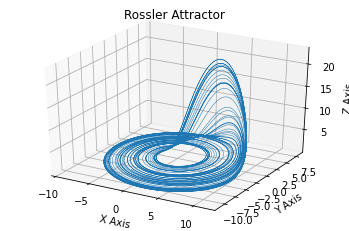

In [58]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x2,y2,z2, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Rossler Attractor")

plt.show()

##Generation function

In [59]:
def _gen_data(system='lorenz_stochastic', observables=[0], \
		   length=10000, x0=None, p=[ 10,8.0/3.0, 28], step=0.001, \
		   sample=0.03, discard=1000, epsilon_sde=0.0, epsilon_add=0.0, \
		   beta_add=0.0):
		
	if system=='lorenz_stochastic':
		t_obs, X_obs, t_gen, X_gen = \
						_gen_lorenz_stochastic(length=length, \
							   x0=x0, sigma=p[0], beta=p[1], rho=p[2],\
							   step=step, sample=sample, \
							   discard=discard, \
							   epsilon_sde=epsilon_sde, \
							   observables=observables)
	elif system=='rossler_stochastic':
		t_obs, X_obs, t_gen, X_gen = \
						_gen_rossler_stochastic(length=length, \
							   x0=x0, a=p[0], b=p[1], c=p[2], \
							   step=step, sample=sample, \
							   discard=discard, \
							   epsilon_sde=epsilon_sde, \
							   observables=observables)
	elif system=='noise':
		Nx = len(observables)
		t_obs = np.arange(0,length*sample,sample)
		X_obs = np.zeros((t_obs.shape[0],Nx))
		t_gen = np.arange(0,length*step,step)
		X_gen = np.zeros((t_gen.shape[0],Nx))

	Nt,Nx = X_obs.shape
	for ii in np.arange(Nx):
		X_obs[:,ii] = X_obs[:,ii] + \
				epsilon_add * cn.powerlaw_psd_gaussian(beta_add, Nt)
	
	return t_obs, X_obs, t_gen, X_gen

In [60]:
C = _gen_data()
print(C)

(array([0.00000000e+00, 3.00000909e-02, 6.00001818e-02, ...,
       2.99910909e+02, 2.99940909e+02, 2.99970909e+02]), array([[-13.96309382],
       [-14.69229561],
       [-14.36972945],
       ...,
       [ 15.74424801],
       [ 14.76378608],
       [ 12.58120336]]), array([0.00000000e+00, 1.00000303e-03, 2.00000606e-03, ...,
       2.99997909e+02, 2.99998909e+02, 2.99999909e+02]), array([[-13.96309382, -17.80659041,  29.9964002 ],
       [-14.00152879, -17.76090789,  30.16504489],
       [-14.03912258, -17.71283305,  30.33328464],
       ...,
       [ 10.07100788,   0.44356209,  37.72088545],
       [  9.97473342,   0.34521942,  37.62476354],
       [  9.87843828,   0.24886975,  37.5278743 ]]))


In [61]:
c = C[3]
x3 = c[:,0]
y3 = c[:,1]
z3 = c[:,2]
print(C[1])
print(C[1].shape)

[[-13.96309382]
 [-14.69229561]
 [-14.36972945]
 ...
 [ 15.74424801]
 [ 14.76378608]
 [ 12.58120336]]
(10000, 1)


In [62]:
print(C[3])
print(C[3].shape)

[[-13.96309382 -17.80659041  29.9964002 ]
 [-14.00152879 -17.76090789  30.16504489]
 [-14.03912258 -17.71283305  30.33328464]
 ...
 [ 10.07100788   0.44356209  37.72088545]
 [  9.97473342   0.34521942  37.62476354]
 [  9.87843828   0.24886975  37.5278743 ]]
(300000, 3)


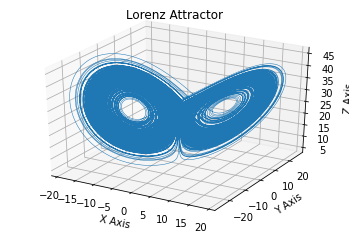

In [63]:
Visualisation = plt.figure().add_subplot(projection='3d')

Visualisation.plot(x3,y3,z3, lw=0.5)
Visualisation.set_xlabel("X Axis")
Visualisation.set_ylabel("Y Axis")
Visualisation.set_zlabel("Z Axis")
Visualisation.set_title("Lorenz Attractor")

plt.show()

##Plots

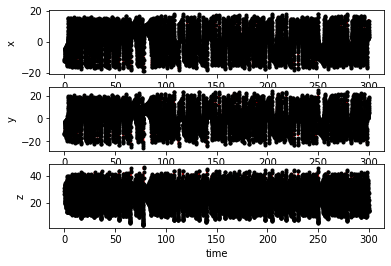

In [64]:
def main():
	t_obs, X_obs, t_gen, X_gen = _gen_data(system='lorenz_stochastic',
											observables=[0,1,2],
											length=10000,
											x0=None,
											p=[10, 8.0/3.0, 28],
											step=0.001,
											sample=0.03,
											discard=1000,
											epsilon_sde=0.0,
											epsilon_add=0.0,
											beta_add=0.0)
	ylabel = ['x','y','z']
	plt.figure()
	for ii in range(3):
		plt.subplot(3,1,ii+1)
		plt.plot(t_gen, X_gen[:,ii],'--r')
		plt.plot(t_obs, X_obs[:,ii],'.k')
		plt.ylabel(ylabel[ii])
		if ii==2: plt.xlabel('time')
	
if __name__ == '__main__':
	main()

#Extension to the Code
___

##Forming a Univariate Series for X Y Z generated:

In [70]:
def univariate_series(sequence, n_steps):
  X1, Y1 = list(), list()
  for i in range(100000):
    end_input = i + n_steps
    if end_input > 99999:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input]
    X1.append(seq_x)
    Y1.append(seq_y)
  return np.array(X1), np.array(Y1)

X1, Y1 = univariate_series(x3,100)

In [71]:
def univariate_series(sequence, n_steps):
  X2, Y2 = list(), list()
  for i in range(100000):
    end_input = i + n_steps
    if end_input > 99999:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input]
    X2.append(seq_x)
    Y2.append(seq_y)
  return np.array(X1), np.array(Y1)

X2, Y2 = univariate_series(y3,100)

In [74]:
def univariate_series(sequence, n_steps):
  X3, Y3 = list(), list()
  for i in range(100000):
    end_input = i + n_steps
    if end_input > 99999:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input]
    X3.append(seq_x)
    Y3.append(seq_y)
  return np.array(X3), np.array(Y3)

X3, Y3 = univariate_series(z3,100)

In [95]:
New_X = np.stack([X1,X2,X3], axis=1)
New_Y = np.stack([Y1,Y2,Y3], axis=1)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(New_X, New_Y, test_size = 0.2, random_state = 0)

In [100]:
import tensorflow as tf 
mlp = tf.keras.models.Sequential()
mlp.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=2, activation='relu'))
mlp.add(tf.keras.layers.Dense(units=1))
mlp.compile(optimizer = 'adam', loss = 'mse')
mlp.fit(X_train,y_train, batch_size = 50, epochs = 100)

Epoch 1/100
1599/1599 [==============================] - 5s 2ms/step - loss: 7.0589
Epoch 2/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0700
Epoch 3/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0169
Epoch 4/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0095
Epoch 5/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0084
Epoch 6/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0074
Epoch 7/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0064
Epoch 8/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0056
Epoch 9/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0049
Epoch 10/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0046
Epoch 11/100
1599/1599 [==============================] - 3s 2ms/step - loss: 0.0039
Epoch 12/100
1599/1599 [==============================] - 3s 2ms/step - lo

In [119]:
predicted_values = mlp.predict(X_test)
actual_values = (y_test)
def unstack(a, axis=0):
    return np.moveaxis(a, axis, 0)
X_pred,Y_pred,Z_pred = unstack(predicted_values, axis=1)
X_ac,Y_ac,Z_ac = unstack(actual_values, axis =1)

[[-7.59815522 -7.59815522 35.5085547 ]
 [ 0.84529227  0.84529227 28.26210132]
 [ 6.84890456  6.84890456 22.30969564]
 ...
 [ 9.97966264  9.97966264 20.90366858]
 [ 1.99032973  1.99032973 23.44735448]
 [ 5.20679842  5.20679842 18.21681357]]
